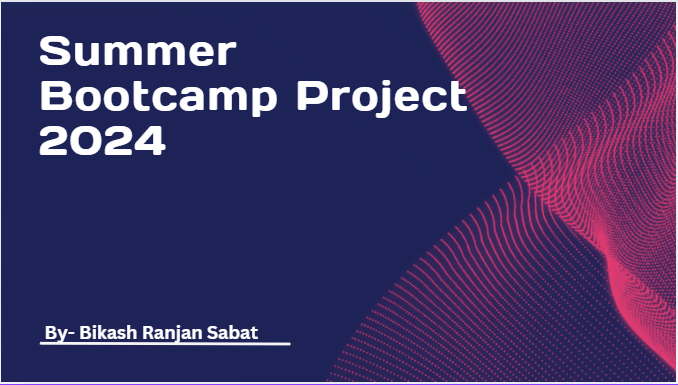

<!-- Objective  -->
Problem Satement:-
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# List of 
* Table-1
* Table-2
* Table-3
* Table-4
* Table-5
* Table-6
* Table-7
* Table-8
* Table-9
* Table-10

# List of Figure
* Fig-1
* Fif-2
* Fig-3

# Data
Data of Wholesale distributor operating in different regions of Portugal .ing

# Data Distribution
⦁	Buyer/Spender- ID's of customers

⦁	Region- Region of the distributor

⦁	Fresh- spending on Fresh Vegetables

⦁	Milk- spending on milk

⦁	Grocery- spending on 

⦁	Frozen- spending on frozen food

⦁	Detergents_paper- spending on detergents and toilet paper

⦁	Delicatessen- spending on instant foods


# Basic Steps
⦁	Display the top 5 rows.

⦁	Display the last 5 rows.

⦁	Check the shape of dataset.

⦁	Check the datatypes of each feature.

⦁	Check the Statistical summary .

⦁	Check the null values.

⦁	Check the duplicate values.

⦁	Check the anomalies or wrong entries.

⦁	Check the outliers and their authenticity.

⦁	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment .

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the datase

In [3]:
data=pd.read_csv('C:\\Users\\BIKASH\\Desktop\\Bootcamp\\dataset.csv')

# Baisic Exploration

In [4]:
data.head()


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


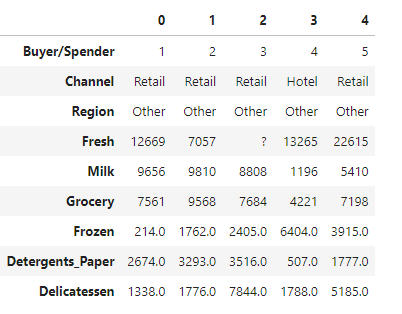

Table - 1

# Observation:- 
->
In 3rd entry there is an anomalie in Fresh Feature which is "?" insted of an integer

In [5]:
print(data.shape)

(440, 9)


The Shape of the dataframe is (440,9)

In [6]:
d=data

In [7]:
d.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


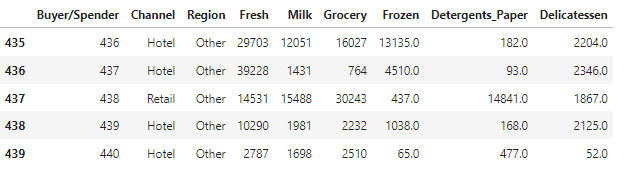

Table - 2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 31.1+ KB


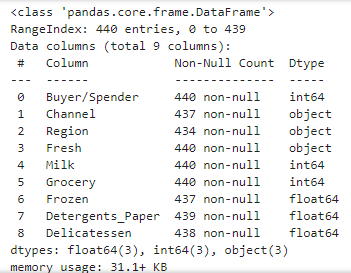

Table - 3

# Observation 
->The Fresh Feature is of object type which should be of integer type.

In [9]:
d.describe()

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


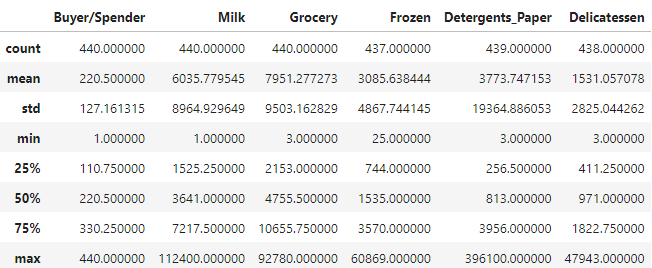

Table - 4

In [10]:
d.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

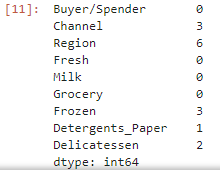

Table - 5

In [11]:
d.duplicated().sum()

0

->It has 0 duplicate values

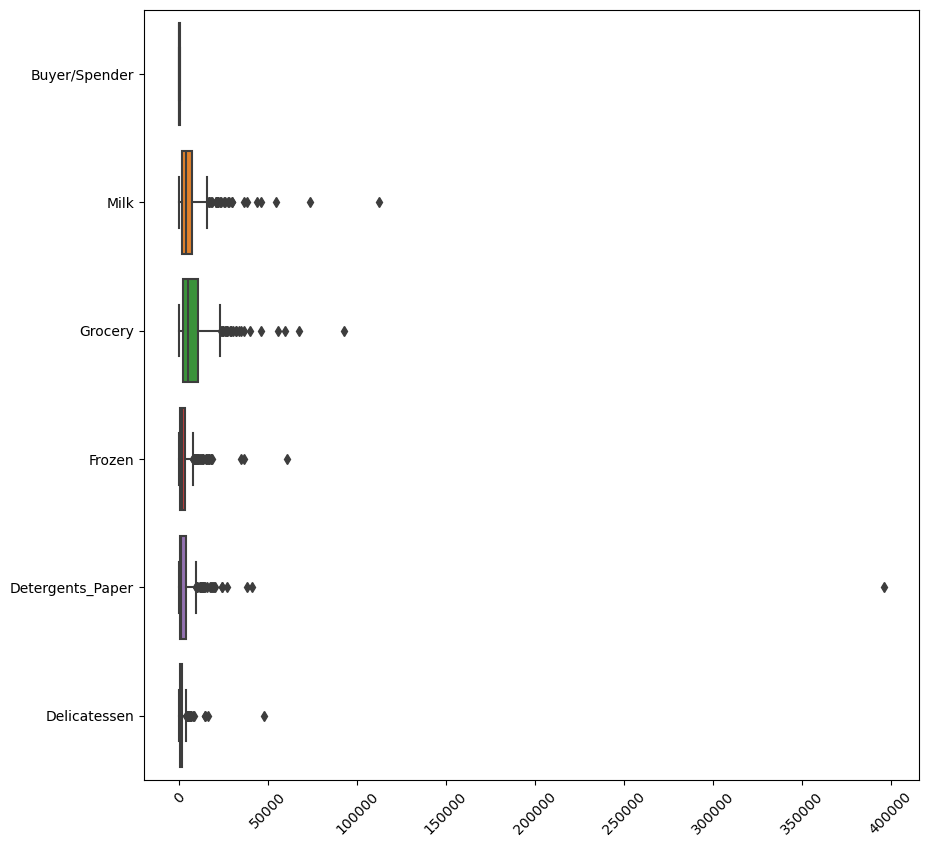

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(data=d,orient = 'h')
plt.xticks(rotation=45);

->Detergents_Paper Feature has an outlier with value more than 350000 .

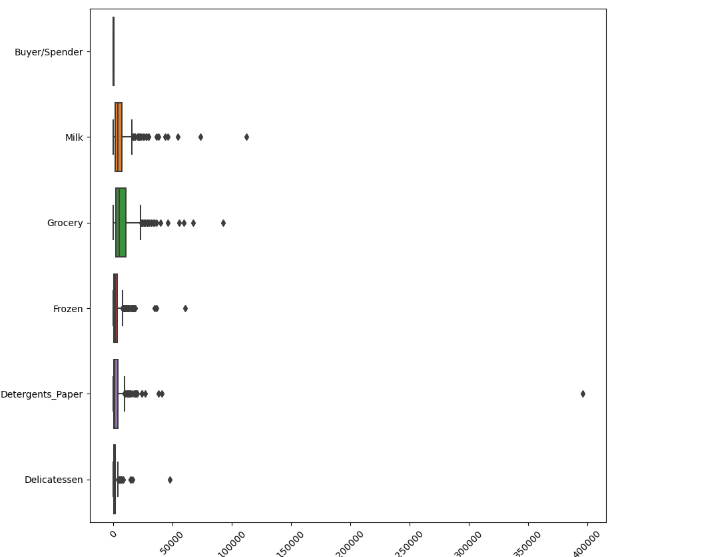

Fig - 1

In [13]:
d[d["Detergents_Paper"]>350000]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
213,214,Hotel,Lisbon,3317,6602,6861,1329.0,396100.0,1215.0


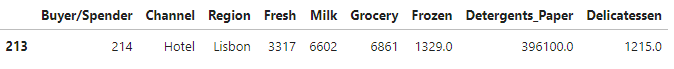

In [15]:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in d.columns:
    if d[i].dtype !='object':
        lr,ur=remove_outlier(d[i])
        d[i]=np.where(d[i]>ur,ur,d[i])
        d[i]=np.where(d[i]<lr,lr,d[i])

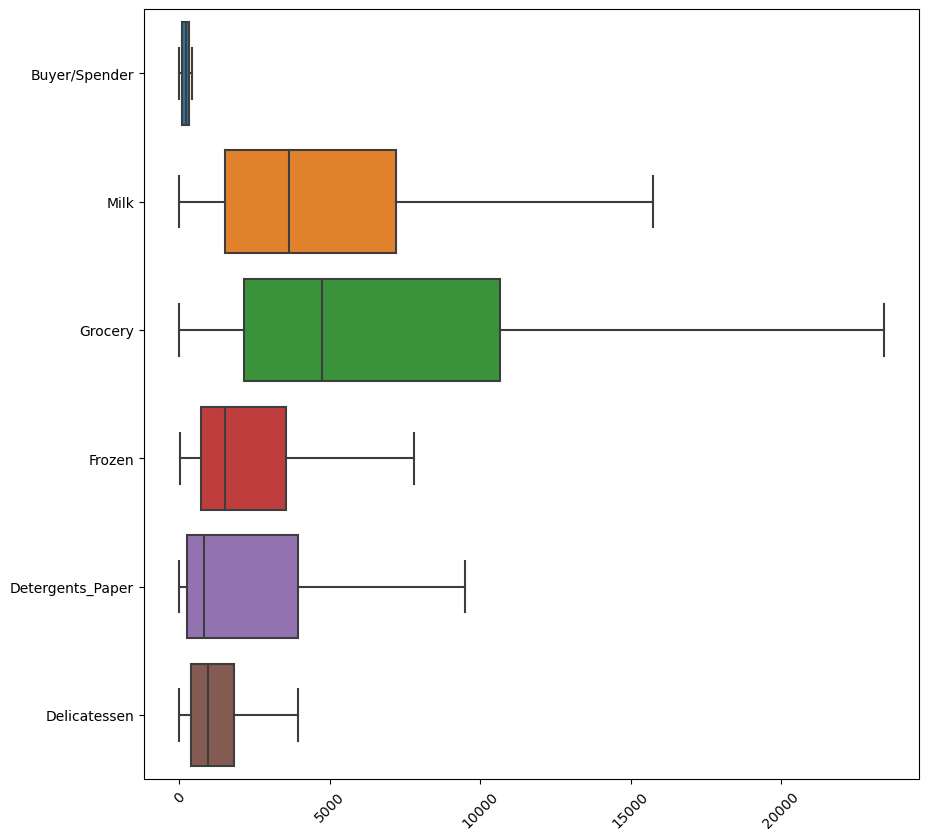

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=d,orient = 'h')
plt.xticks(rotation=45);

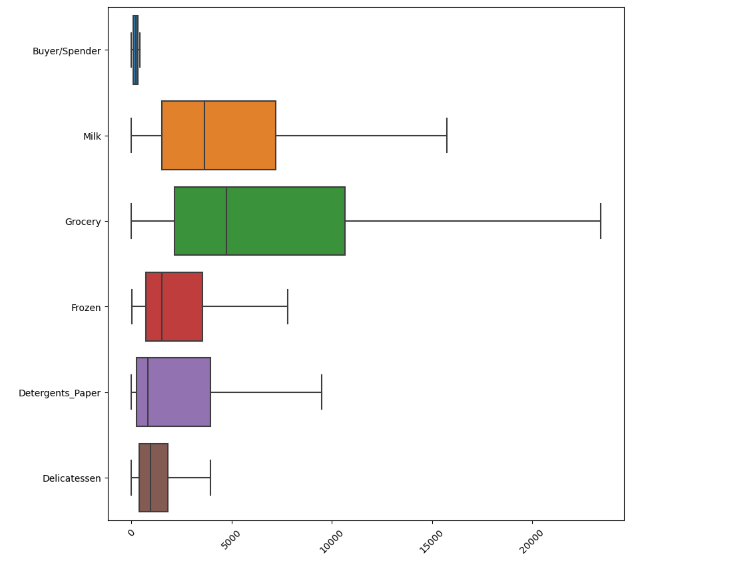

Fig - 2

In [17]:
d[d["Fresh"]=="?"]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,3.0,Retail,Other,?,8808.0,7684.0,2405.0,3516.0,3940.0
78,79.0,Hotel,Other,?,1175.0,2067.0,2096.0,301.0,167.0


**rows at index 2 and 78 has anomalies

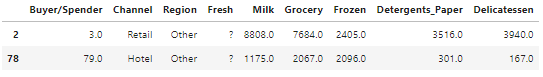

Table - 5

In [18]:
d.loc[2,"Fresh"]=np.nan
d.loc[78,"Fresh"]=np.nan

In [19]:
d["Fresh"]=d["Fresh"].astype(float)

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    float64
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             438 non-null    float64
 4   Milk              440 non-null    float64
 5   Grocery           440 non-null    float64
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(7), object(2)
memory usage: 31.1+ KB


In [21]:
d.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,438.000000,440.000000,440.00000,437.000000,439.000000,438.000000
mean,220.500000,12016.009132,5073.405966,7236.37500,2520.469108,2408.965262,1271.831050
std,127.161315,12673.210863,4435.284867,6596.53308,2419.855198,2976.297834,1083.224242
min,1.000000,3.000000,1.000000,3.00000,25.000000,3.000000,3.000000
25%,110.750000,3111.250000,1525.250000,2153.00000,744.000000,256.500000,411.250000
50%,220.500000,8504.000000,3641.000000,4755.50000,1535.000000,813.000000,971.000000
75%,330.250000,16935.250000,7217.500000,10655.75000,3570.000000,3956.000000,1822.750000
max,440.000000,112151.000000,15755.875000,23409.87500,7809.000000,9505.250000,3940.000000


* Properties of all Features.

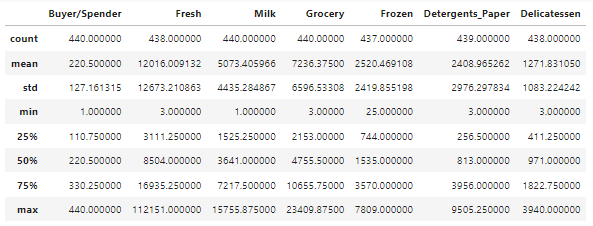

Table - 6

In [22]:
d.loc[2,"Fresh"]=d["Fresh"].mean()
d.loc[78,"Fresh"]=d["Fresh"].mean()

In [23]:
d[d["Frozen"].isnull()==True]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
6,7.0,Retail,Other,12126.0,3199.0,6975.0,NaN,3140.0,545.0
94,95.0,Retail,Other,5626.0,12220.0,11323.0,NaN,5038.0,244.0
164,165.0,Retail,Other,5224.0,7603.0,8584.0,NaN,3674.0,238.0


In [24]:
d.loc[6,"Frozen"]=d["Frozen"].mean()
d.loc[94,"Frozen"]=d["Frozen"].mean()
d.loc[164,"Frozen"]=d["Frozen"].mean()

In [25]:
d[d["Detergents_Paper"].isnull()==True]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
7,8.0,Retail,Other,7579.0,4956.0,9426.0,1669.0,NaN,2566.0


In [26]:
d.loc[7,"Detergents_Paper"]=d["Detergents_Paper"].mean()

In [27]:
d[d["Delicatessen"].isnull()==True]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
343,344.0,Retail,Other,1689.0,6964.0,23409.875,1456.0,9505.25,NaN
345,346.0,Hotel,Other,1198.0,2602.0,8335.000,402.0,3843.00,NaN


In [28]:
d.loc[343,"Delicatessen"]=d["Delicatessen"].mean()
d.loc[345,"Delicatessen"]=d["Delicatessen"].mean()

In [29]:
d.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.00000,440.000000,440.000000,440.000000
mean,220.500000,12016.009132,5073.405966,7236.37500,2520.469108,2408.965262,1271.831050
std,127.161315,12644.309547,4435.284867,6596.53308,2411.572726,2972.906040,1080.753944
min,1.000000,3.000000,1.000000,3.00000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1525.250000,2153.00000,761.250000,256.750000,411.750000
50%,220.500000,8549.000000,3641.000000,4755.50000,1567.000000,816.500000,977.500000
75%,330.250000,16933.750000,7217.500000,10655.75000,3554.250000,3932.500000,1820.250000
max,440.000000,112151.000000,15755.875000,23409.87500,7809.000000,9505.250000,3940.000000


# 1 Spending Analysis

->What is the total number of buyers in the dataset?


In [30]:
d.shape

(440, 9)

*  The total no. of buyiers is 440

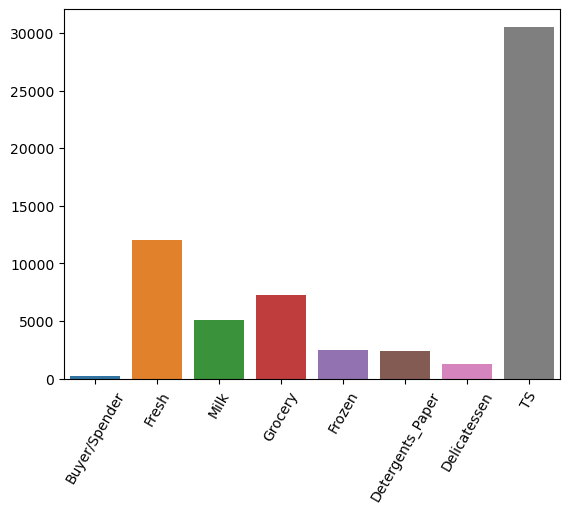

In [164]:
va=d.describe().iloc[1].values
In=d.describe().iloc[1].index
sns.barplot(x=In,y=va)
plt.xticks(rotation=60);

The average of all Features
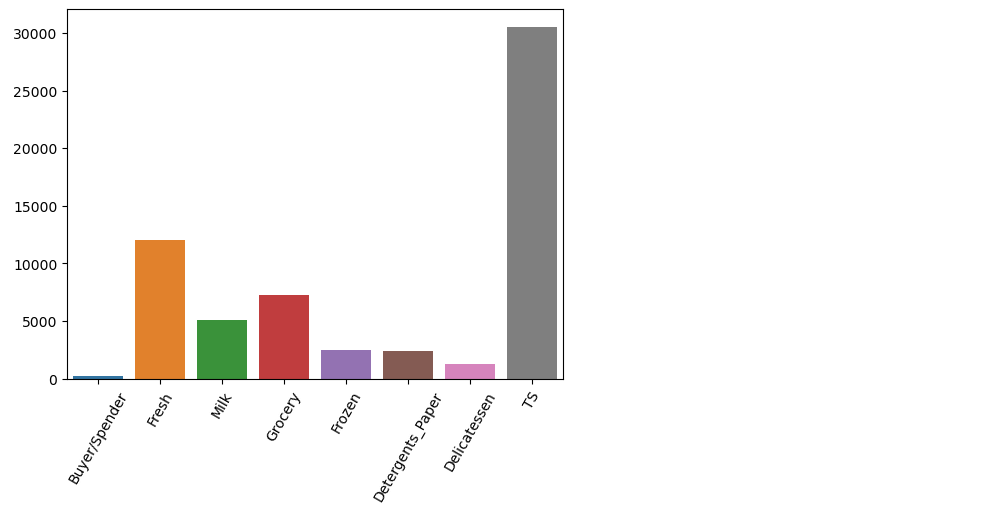
Fig-1.0


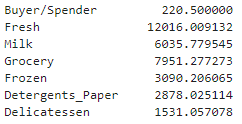
Table 1.0


In [32]:
d.describe().iloc[1][d.describe().iloc[1]==d.describe().iloc[1].max()]

Fresh    12016.009132
Name: mean, dtype: float64

* Fresh catagory has the highest average spending.

In [33]:
d[d["Fresh"]>d.describe().iloc[1].max()]["Buyer/Spender"].count()

159

* 159 buyers spend above the average on Fresh Vegetables.

# 2 Regional Demand

In [40]:
d["TS"]=d["Fresh"]+d["Milk"]+d["Grocery"]+d["Frozen"]+d["Detergents_Paper"]+d["Delicatessen"]

In [42]:
d.groupby("Region")["TS"].sum()

Region
Lisbon    2.190616e+06
Oporto    1.300669e+06
Other     9.790238e+06
Name: TS, dtype: float64

->The total spending in each region is :

Lisbon : 2.190616e+06.

Oporto : 1.300669e+06.

Other  : 9.790238e+.06

In [44]:
d.groupby("Region")["Milk"].sum()

Region
Lisbon     373927.500
Oporto     217521.625
Other     1616720.625
Name: Milk, dtype: float64

<Axes: xlabel='Region', ylabel='Milk'>

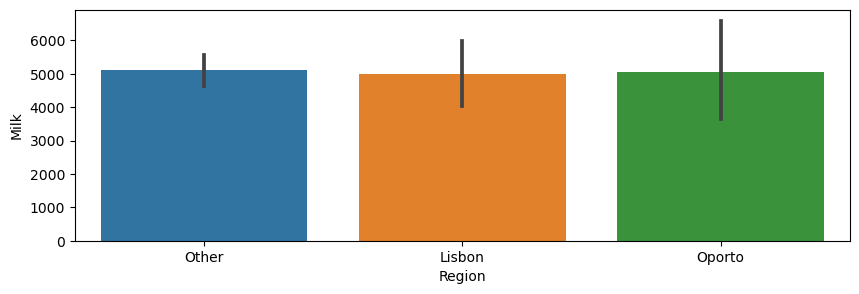

In [63]:
plt.figure(figsize=(10,3))
sns.barplot(data=d,x="Region",y="Milk")

* Other region has highest spending on Milk.

In [46]:
d.groupby("Region")["Grocery"].mean()


Region
Lisbon    6717.433333
Oporto    8601.130814
Other     7184.794304
Name: Grocery, dtype: float64

* Average spending on grocery is highest in "Other" Region and lowest in "Lisbon" .

In [59]:
d.groupby("Region")["TS"].mean()

Region
Lisbon    29208.220000
Oporto    30248.110465
Other     30981.766386
Name: TS, dtype: float64

* "Oporto" region has the highest average spending per buyer.

# 3 Category Preferences

In [73]:
d[d["Frozen"]>d["Delicatessen"]].count().iloc[0]/440*100

66.13636363636364

* 66.13636363636364 percentage of buyers spend more on Frozen food compared to Delicatessen.

In [89]:
b=d.describe().iloc[2][d.describe().iloc[2]<d.describe().iloc[2].max()]

Buyer/Spender         127.161315
Fresh               12644.309547
Milk                 4435.284867
Grocery              6596.533080
Frozen               2411.572726
Detergents_Paper     2972.906040
Delicatessen         1080.753944
Name: std, dtype: float64

In [90]:
b.describe().iloc[2][b.describe().iloc[2]==b.describe().iloc[2].max()]

Fresh    8557.137637
Name: std, dtype: float64

* Fresh category shows the most variation in spending among buyers

In [95]:
d[(d["Fresh"]<d["Detergents_Paper"])&(d["Milk"]<d["Detergents_Paper"])&(d["Detergents_Paper"]>d["Grocery"])&(d["Detergents_Paper"]>d["Frozen"])&(d["Detergents_Paper"]>d["Delicatessen"])]["Region"]

213    Lisbon
228    Lisbon
Name: Region, dtype: object

* Lisbon is the region where spending on Detergents_paper is significantly higher than others

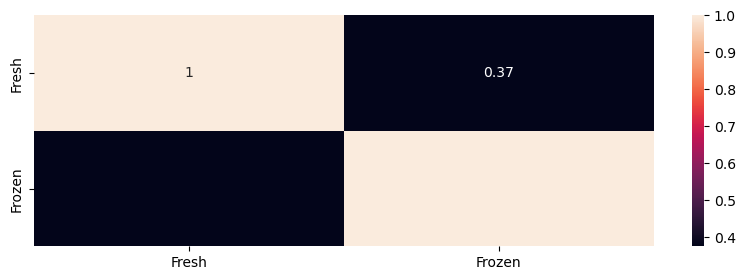

In [96]:
corr=d[['Fresh','Frozen']].corr()
plt.figure(figsize=(10,3))1
sns.heatmap(corr, annot= True);

* 0.37 is the correlation between spending on Fresh and Frozen food

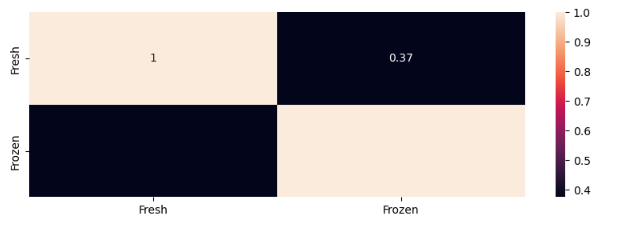

Fig - 3

# 4 Customer Segment

In [104]:
t = d[d['Fresh'] > d['Fresh'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,211.568182,40693.909091,5782.437500,7237.403409,4467.613636,1342.965909,1926.931818,61451.261364
std,131.158416,15627.339389,5031.556791,6089.871474,2790.905690,2132.859038,1229.882191,23017.808913
min,13.000000,27167.000000,286.000000,471.000000,287.000000,20.000000,3.000000,34698.000000
25%,100.000000,30562.750000,2054.250000,2493.250000,1726.250000,211.500000,1067.750000,47412.500000
50%,218.500000,36832.000000,3954.500000,5428.500000,4494.500000,601.500000,1821.500000,55118.500000
75%,295.500000,43565.250000,7265.500000,8578.250000,7809.000000,1324.000000,2880.250000,68336.250000
max,437.000000,112151.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,162751.875000


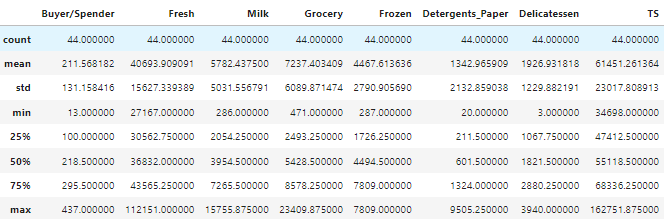

Table - 6

In [105]:
t = d[d['Milk'] > d['Milk'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,196.500000,13573.431818,15042.286932,18611.653409,2930.409091,6599.909091,2077.000000,58834.690341
std,126.616524,18946.973787,1145.466730,6383.194773,2541.921406,3619.303961,1429.678839,22064.216903
min,12.000000,85.000000,12653.000000,1660.000000,33.000000,51.000000,3.000000,26953.000000
25%,75.000000,4109.250000,14580.500000,16381.750000,957.500000,3904.500000,803.750000,49111.656250
50%,192.500000,6301.000000,15755.875000,21550.500000,1824.500000,8678.000000,1584.000000,55459.500000
75%,307.750000,14802.000000,15755.875000,23409.875000,4490.250000,9505.250000,3940.000000,65090.281250
max,438.000000,112151.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,162751.875000


In [107]:
t = d[d['Grocery'] > d['Grocery'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,187.954545,8894.090909,12151.701705,22281.181818,2088.204545,8243.971591,1875.882524,55535.033092
std,116.049700,10724.302876,4454.071193,1462.146367,2031.173467,2283.654594,1369.415870,14955.597318
min,24.000000,37.000000,1266.000000,19172.000000,36.000000,239.000000,3.000000,30578.000000
25%,76.500000,1357.000000,9418.250000,21162.750000,758.500000,7506.750000,714.500000,46743.187500
50%,179.000000,5074.000000,14234.000000,23409.875000,1365.000000,9505.250000,1437.500000,53354.750000
75%,302.750000,12140.500000,15755.875000,23409.875000,2770.000000,9505.250000,2992.250000,62788.750000
max,438.000000,44466.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,104859.000000


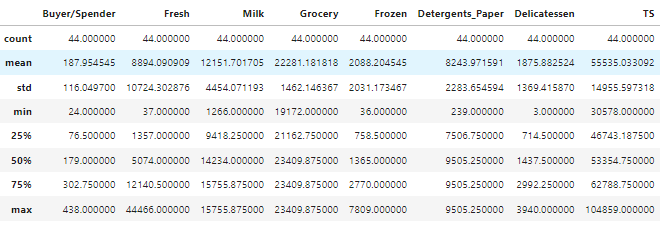

Table - 7

In [108]:
t = d[d['Frozen'] > d['Frozen'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,239.886364,24000.931818,5033.892045,5981.201705,7805.522727,890.301136,1882.704545,45594.553977
std,132.228522,21712.055604,4819.802776,5364.072425,19.333654,1555.474522,1213.047087,29160.788189
min,23.000000,3.000000,333.000000,683.000000,7683.000000,15.000000,46.000000,15731.000000
25%,110.750000,10141.500000,1880.250000,2514.750000,7809.000000,244.250000,905.500000,27460.250000
50%,259.500000,18408.000000,3488.500000,4604.500000,7809.000000,440.500000,1724.000000,34431.000000
75%,339.250000,29933.250000,5375.500000,7026.000000,7809.000000,850.500000,2700.500000,52388.500000
max,436.000000,112151.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,162751.875000


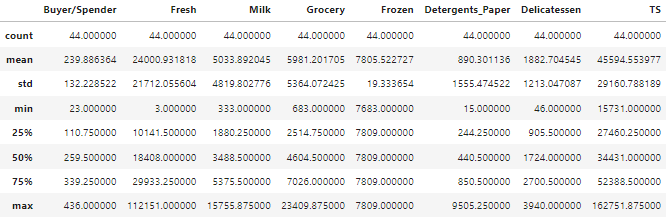

Table - 8

In [109]:
t = d[d['Detergents_Paper'] > d['Detergents_Paper'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000
mean,193.204545,7563.318182,11890.823864,20325.048295,1705.636364,9175.06250,1634.109797,52293.999001
std,115.848855,9139.766726,3931.623321,4318.787439,1712.759844,595.12105,1236.212735,15041.878977
min,29.000000,85.000000,3688.000000,6861.000000,36.000000,7572.00000,59.000000,28829.250000
25%,85.000000,1914.000000,8232.750000,18423.500000,478.250000,8960.00000,714.500000,44229.529538
50%,187.500000,5125.000000,12786.500000,23409.875000,1143.000000,9505.25000,1276.915525,49955.000000
75%,304.250000,9486.750000,15755.875000,23409.875000,2507.250000,9505.25000,2503.500000,57694.875000
max,438.000000,44466.000000,15755.875000,23409.875000,7782.000000,9505.25000,3940.000000,104859.000000


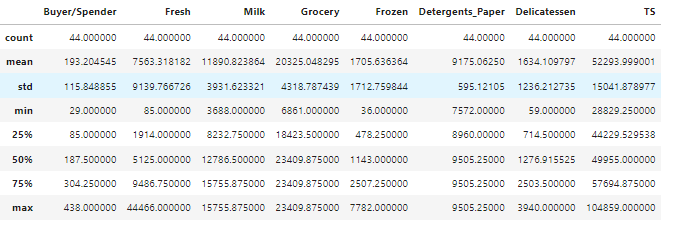

Table - 8

In [110]:
t = d[d['Delicatessen'] > d['Delicatessen'].quantile(0.90)]
t.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,175.886364,17996.795662,8975.892045,11541.349432,3716.068182,3467.801136,3684.431818,49382.338276
std,134.894139,19724.509749,5356.401080,7437.894536,2672.931719,3252.435828,352.483508,25860.827323
min,3.000000,18.000000,928.000000,1641.000000,42.000000,235.000000,2963.000000,14406.000000
25%,44.750000,4789.500000,4354.500000,4964.750000,1449.250000,735.250000,3308.500000,32960.500000
50%,162.000000,12776.504566,7382.000000,9794.500000,3242.000000,2128.500000,3940.000000,45920.500000
75%,280.000000,24244.750000,15755.875000,18565.000000,6163.500000,4954.250000,3940.000000,57123.562500
max,412.000000,112151.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,162751.875000


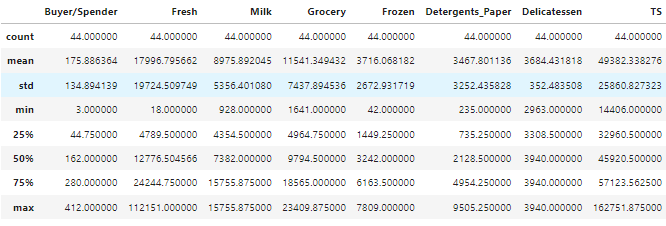

Table - 9

In [111]:
h_S = d[d['TS'] > d['TS'].quantile(0.80)]
l_S = d[d['TS'] < d['TS'].quantile(0.20)]
h_S.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,183.443182,24310.875000,9841.934659,14515.742898,3328.261364,4934.420455,2084.454545,59015.688920
std,129.357551,19692.189777,5118.551270,7706.500680,2612.326688,3851.283191,1260.102002,16785.446601
min,10.000000,85.000000,555.000000,764.000000,36.000000,20.000000,3.000000,45408.000000
25%,63.500000,8264.250000,4915.750000,7270.000000,1113.250000,815.500000,1067.750000,48573.000000
50%,169.000000,22343.000000,10869.500000,15191.000000,2712.500000,5003.000000,1845.500000,54131.500000
75%,283.500000,36241.750000,15733.468750,22502.250000,5176.250000,9505.250000,3056.000000,65090.281250
max,438.000000,112151.000000,15755.875000,23409.875000,7809.000000,9505.250000,3940.000000,162751.875000


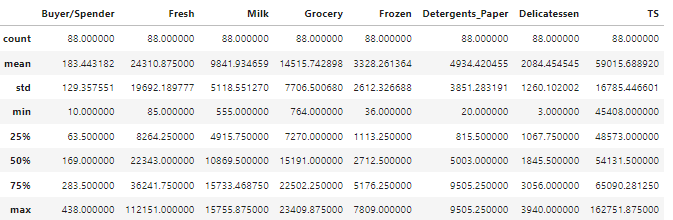

Table - 10

In [112]:
l_S.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,TS
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,251.465909,3836.545455,1835.113636,2243.375000,1340.590909,516.375000,684.022727,10456.022727
std,113.664150,2856.551928,1551.468103,1497.727591,1156.243140,764.755138,686.959183,3354.991474
min,22.000000,3.000000,1.000000,137.000000,65.000000,5.000000,3.000000,904.000000
25%,154.250000,1448.750000,843.250000,1280.250000,518.500000,153.000000,278.500000,9132.500000
50%,245.000000,3288.500000,1258.000000,2017.000000,963.500000,263.500000,494.000000,10946.500000
75%,362.250000,6233.250000,2652.250000,2832.250000,1690.250000,490.750000,971.500000,12748.750000
max,440.000000,9785.000000,8847.000000,8118.000000,5502.000000,4762.000000,3940.000000,15454.000000


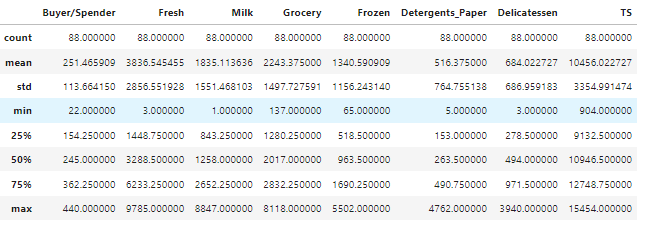

Table - 11

# 5 Cross-Category Analysis

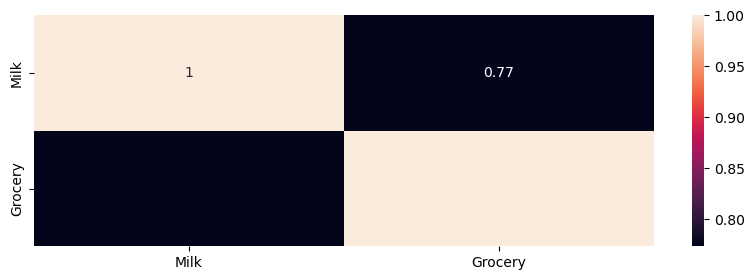

In [113]:
corr=d[['Milk','Grocery']].corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True);

* A significant and a positive correlation exists between Milk and Grocery with a correlation value of 0.77.

In [114]:
d[['Delicatessen','Frozen']].corr()

,Delicatessen,Frozen
Delicatessen,1.00000,0.23194
Frozen,0.23194,1.00000


* The poor correlation shows that a buyier who spends more on Frozen food spends less on Delicatessen.

In [117]:
d.groupby("Region")["Milk"].mean()+d.groupby("Region")["Fresh"].mean()

Region
Lisbon    16259.140000
Oporto    15113.130814
Other     17671.552669
dtype: float64

* The combined average spending on Fresh and Milk for each region is:

Lisbon - 16259.140000

Oporto - 15113.130814

Other  - 17671.552669

# 6 Demand Trends

In [122]:
d.groupby("Region")["Fresh"].mean()

Region
Lisbon    11273.440000
Oporto    10054.488372
Other     12555.348159
Name: Fresh, dtype: float64

* Lisbon Region has the fastest growing spending on Fresh Vegetables.

# 7 Buyer Insights

In [136]:
d.groupby("Region")["TS"].std()

Region
Lisbon    16206.201167
Oporto    14996.166548
Other     19434.078281
Name: TS, dtype: float64

* Lisbon has most diverse spending pattern

In [144]:
o=d["TS"].mean()/100
lo=o*90
up=o*100

In [157]:
d[(d["TS"]>lo)&(d["TS"]<up)]["Buyer/Spender"].count()

36

* Around 36 Buyer/Spender has spend consistently